#Understanding Data

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/user_behavior_dataset.csv')

In [ ]:
df.head()

User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3                        56                  871   20    Male   
4                        58                  988   31  Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
df.describe()

User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min                 302.000000                 10.000000           102.000000   
25%                 722.250000                 26.000000           373.000000   
50%                1502.500000                 49.000000           823.500000   
75%                2229.500000                 74.000000          1341.000000   
max                2993.000000                 99.000000          2497.000000   

              Age  User Behavior Class  
count  700.000000           700.000000  
mean    38.482857             2.990000  
std     12.012916             1.401476  
min     18.000000             1.000000  
25%     28.000000             2.000000  
50%     38.000000             3.000000  
75%     49.000000             4.000000  
max     59.000000             5.000000

In [ ]:
df.describe().transpose()

count         mean         std    min     25%  \
User ID                     700.0   350.500000  202.216880    1.0  175.75   
App Usage Time (min/day)    700.0   271.128571  177.199484   30.0  113.25   
Screen On Time (hours/day)  700.0     5.272714    3.068584    1.0    2.50   
Battery Drain (mAh/day)     700.0  1525.158571  819.136414  302.0  722.25   
Number of Apps Installed    700.0    50.681429   26.943324   10.0   26.00   
Data Usage (MB/day)         700.0   929.742857  640.451729  102.0  373.00   
Age                         700.0    38.482857   12.012916   18.0   28.00   
User Behavior Class         700.0     2.990000    1.401476    1.0    2.00   

                               50%      75%     max  
User ID                      350.5   525.25   700.0  
App Usage Time (min/day)     227.5   434.25   598.0  
Screen On Time (hours/day)     4.9     7.40    12.0  
Battery Drain (mAh/day)     1502.5  2229.50  2993.0  
Number of Apps Installed      49.0    74.00    99.0  
Data Usage (MB/day)          823.5  1341.00  2497.0  
Age                           38.0    49.00    59.0  
User Behavior Class            3.0     4.00     5.0

In [ ]:
df.describe(include='O')

Device Model Operating System Gender
count            700              700    700
unique             5                2      2
top     Xiaomi Mi 11          Android   Male
freq             146              554    364

In [ ]:
df.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

# Split the data into Training, Validation, and Test sets

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


In [ ]:
X = df.drop('User Behavior Class', axis=1)
y = df['User Behavior Class']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nValue Counts for Target Variable (Random Split):")
print("Training set (User Behavior Class):")
print(y_train.value_counts(normalize=True))
print("\nValidation set (User Behavior Class):")
print(y_val.value_counts(normalize=True))
print("\nTest set (User Behavior Class):")
print(y_test.value_counts(normalize=True))


Value Counts for Target Variable (Random Split):
Training set (User Behavior Class):
User Behavior Class
2    0.250000
5    0.200000
4    0.195238
3    0.178571
1    0.176190
Name: proportion, dtype: float64

Validation set (User Behavior Class):
User Behavior Class
3    0.264286
1    0.235714
4    0.178571
5    0.178571
2    0.142857
Name: proportion, dtype: float64

Test set (User Behavior Class):
User Behavior Class
4    0.228571
3    0.221429
1    0.207143
5    0.192857
2    0.150000
Name: proportion, dtype: float64


In [ ]:
X_train_strat, X_temp_strat, y_train_strat, y_temp_strat = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val_strat, X_test_strat, y_val_strat, y_test_strat = train_test_split(X_temp_strat, y_temp_strat, test_size=0.5, random_state=42, stratify=y_temp_strat)

print("\nValue Counts for Target Variable (Stratified Split):")
print("Training set (User Behavior Class):")
print(y_train_strat.value_counts(normalize=True))
print("\nValidation set (User Behavior Class):")
print(y_val_strat.value_counts(normalize=True))
print("\nTest set (User Behavior Class):")
print(y_test_strat.value_counts(normalize=True))


Value Counts for Target Variable (Stratified Split):
Training set (User Behavior Class):
User Behavior Class
2    0.209524
3    0.204762
4    0.197619
1    0.195238
5    0.192857
Name: proportion, dtype: float64

Validation set (User Behavior Class):
User Behavior Class
2    0.207143
4    0.200000
5    0.200000
3    0.200000
1    0.192857
Name: proportion, dtype: float64

Test set (User Behavior Class):
User Behavior Class
3    0.207143
2    0.207143
4    0.200000
5    0.192857
1    0.192857
Name: proportion, dtype: float64


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
print(f"Training set (X_train, y_train) shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set (X_val, y_val) shape: {X_val.shape}, {y_val.shape}")
print(f"Test set (X_test, y_test) shape: {X_test.shape}, {y_test.shape}")

Training set (X_train, y_train) shape: (420, 10), (420,)
Validation set (X_val, y_val) shape: (140, 10), (140,)
Test set (X_test, y_test) shape: (140, 10), (140,)


In [ ]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

# Exploratory Data Analysis (EDA)

### Analyze the target variable

In [ ]:
df['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

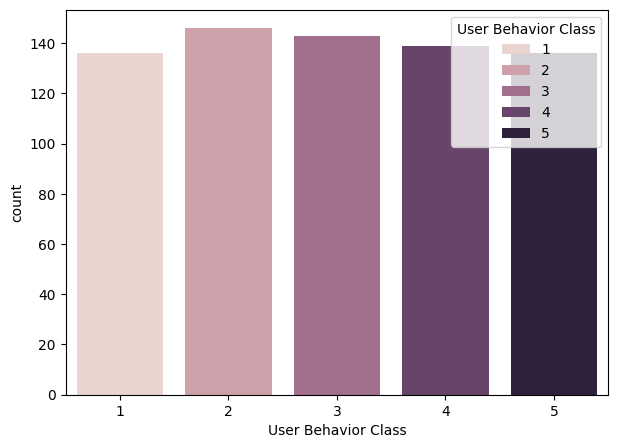

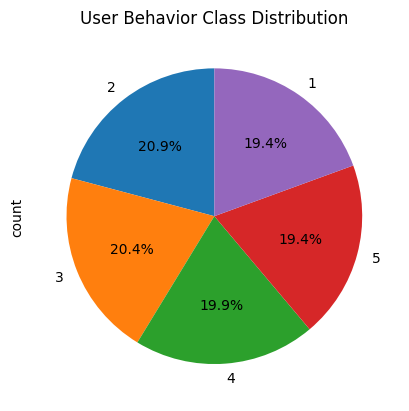

In [ ]:
plt.figure(figsize=(7,5))

sns.countplot(x='User Behavior Class',hue='User Behavior Class', data=df)
plt.show()

df['User Behavior Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('User Behavior Class Distribution')
plt.show()




### Assess Missing Values


In [ ]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

### Explore relationships between features and the target variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


 Device Model and User Behavior Class


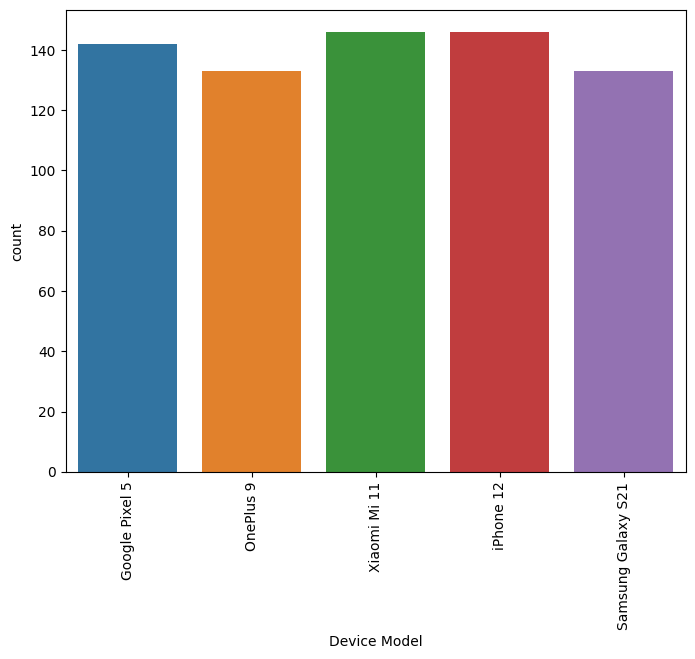

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(x='Device Model', hue='Device Model', data=df)
plt.xticks(rotation=90)
plt.show()

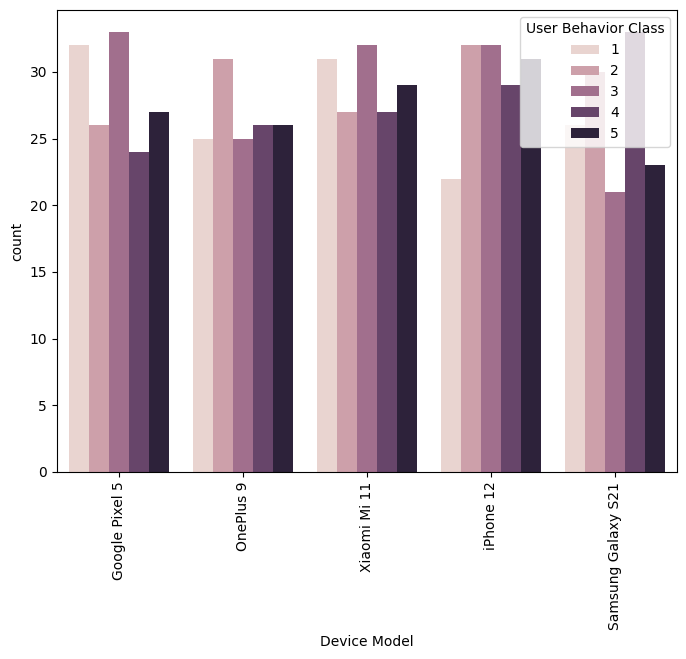

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(x='Device Model', hue='User Behavior Class', data=df)
plt.xticks(rotation=90)
plt.show()


Operating System and User Behavior Class


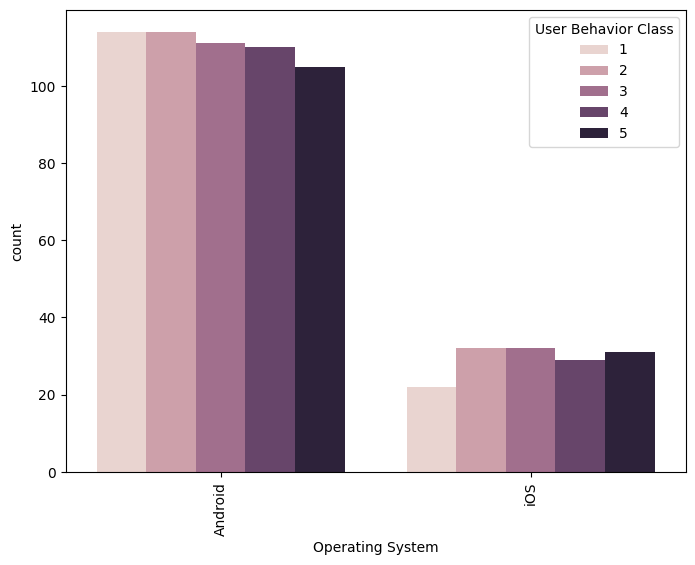

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(x='Operating System', hue='User Behavior Class', data=df)
plt.xticks(rotation=90)
plt.show()

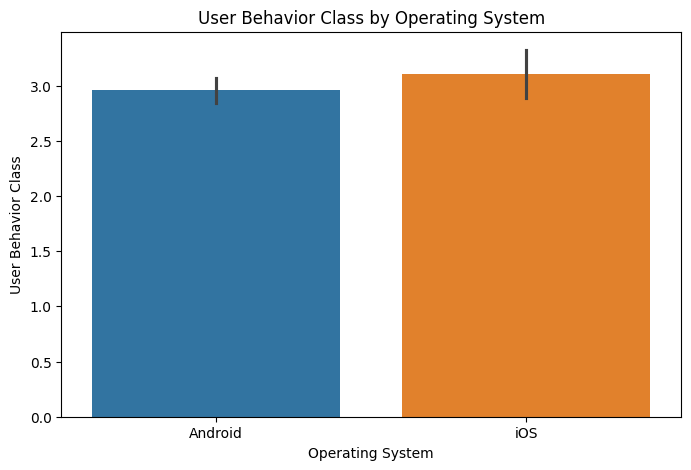

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Operating System', y='User Behavior Class', data=df, hue='Operating System')
plt.title('User Behavior Class by Operating System')
plt.ylabel('User Behavior Class')
plt.show()


App Usage Time (min/day) and User Behavior Class


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

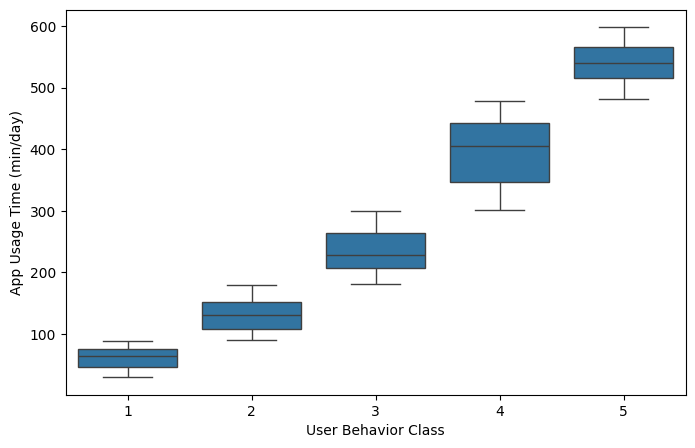

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=df)
plt

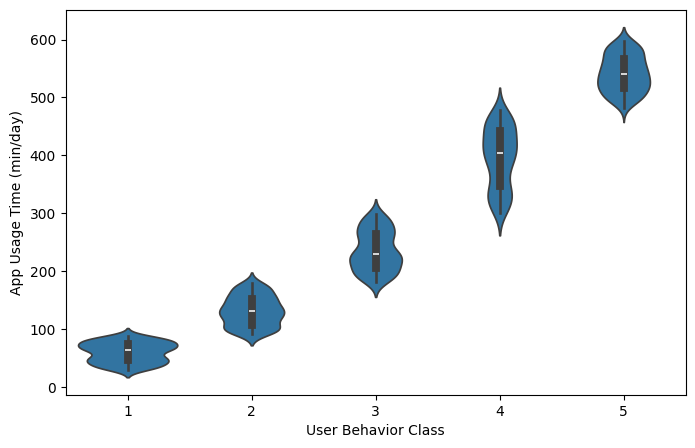

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='User Behavior Class', y='App Usage Time (min/day)', data=df)
plt.show()

Screen On Time (hours/day) and User Behavior Class

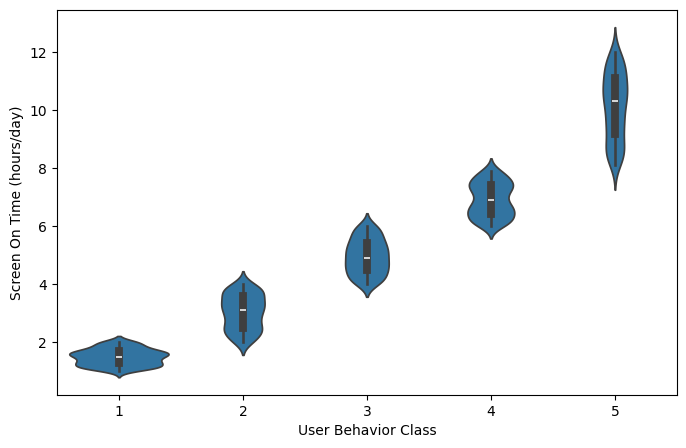

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='User Behavior Class', y='Screen On Time (hours/day)', data=df)
plt.show()


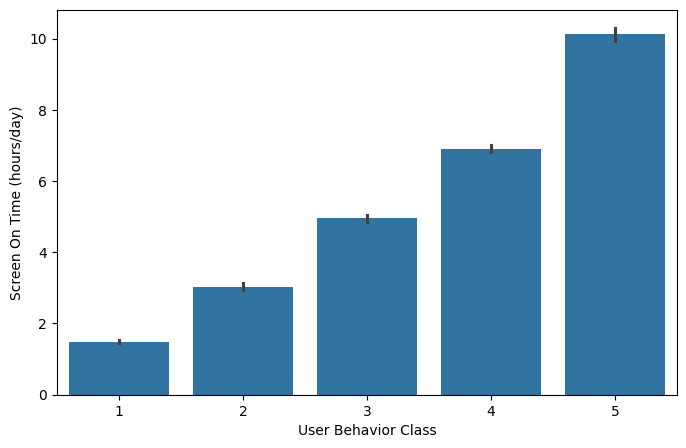

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='User Behavior Class', y='Screen On Time (hours/day)', data=df)
plt.show()

Battery Drain (mAh/day) and User Behavior Class

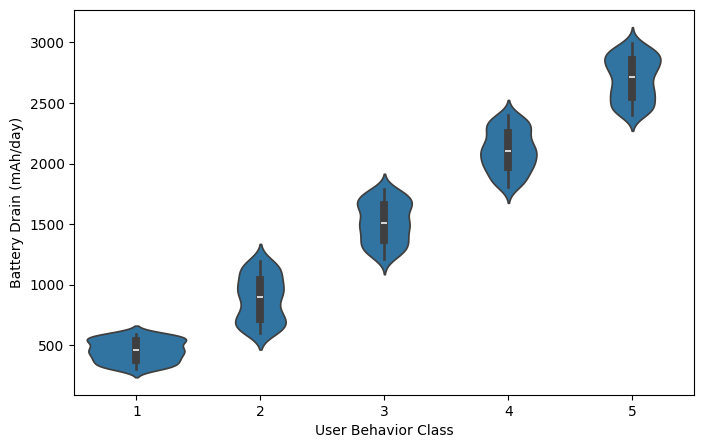

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='User Behavior Class', y='Battery Drain (mAh/day)', data=df)
plt.show()


Number of Apps Installed and User Behavior Class

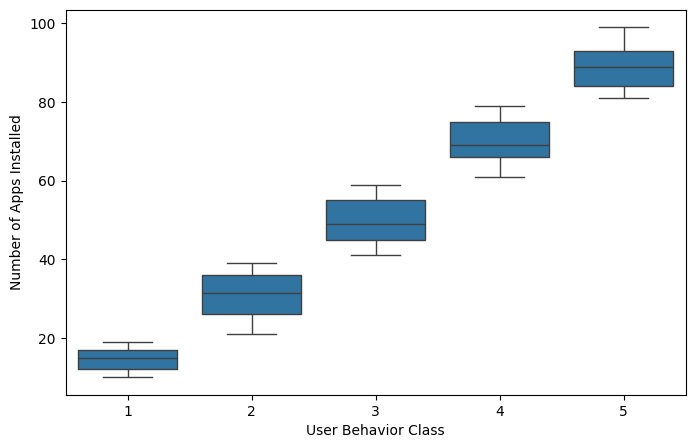

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='User Behavior Class', y='Number of Apps Installed', data=df)
plt.show()


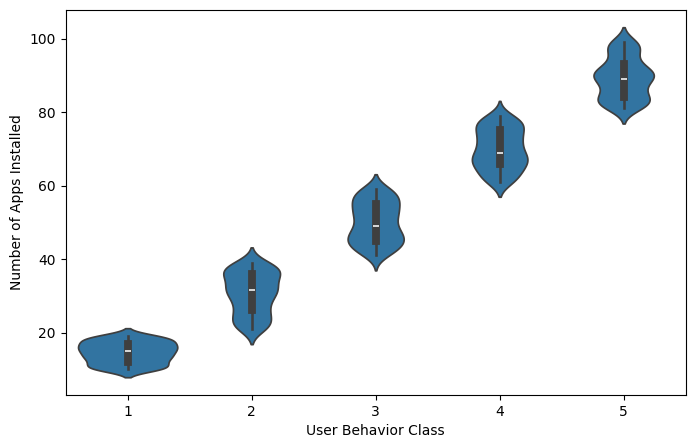

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='User Behavior Class', y='Number of Apps Installed', data=df)
plt.show()

Data Usage (MB/day) and User Behavior Class






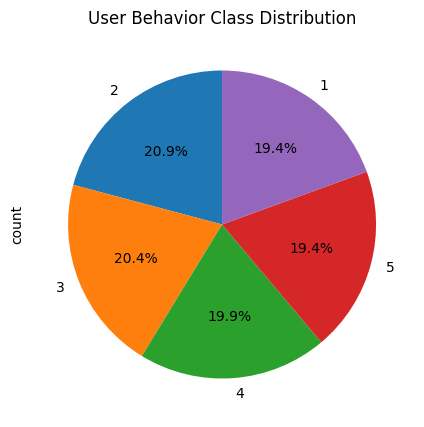

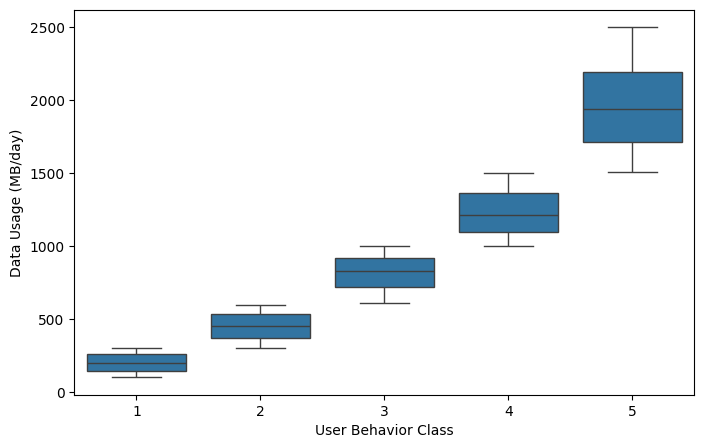

In [ ]:
plt.figure(figsize=(8, 5))
df['User Behavior Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('User Behavior Class Distribution')
plt
plt.figure(figsize=(8, 5))
sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df)
plt.show()


Age and User Behavior Class


<Axes: xlabel='Age', ylabel='Count'>

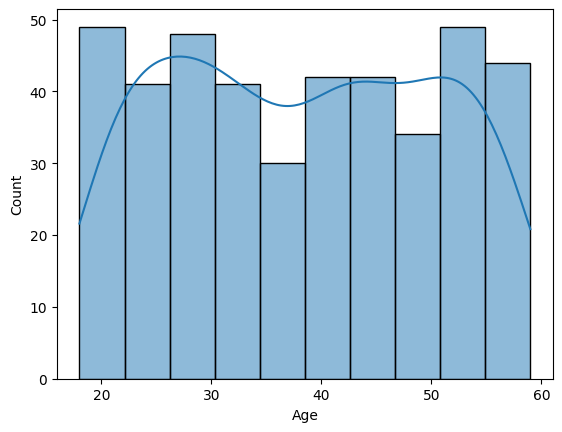

In [ ]:
sns.histplot(data=X_train, x="Age", kde=True)

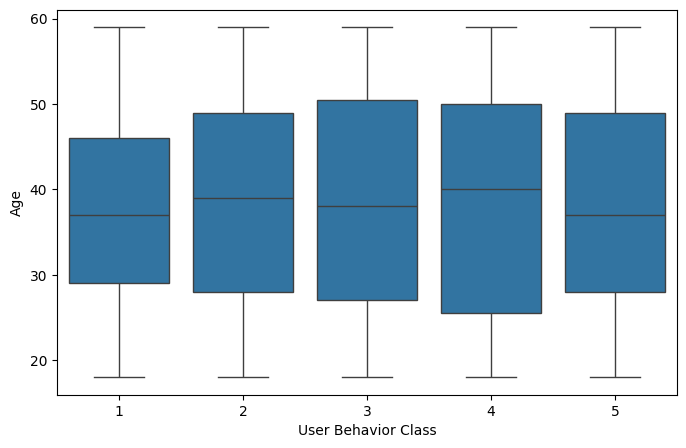

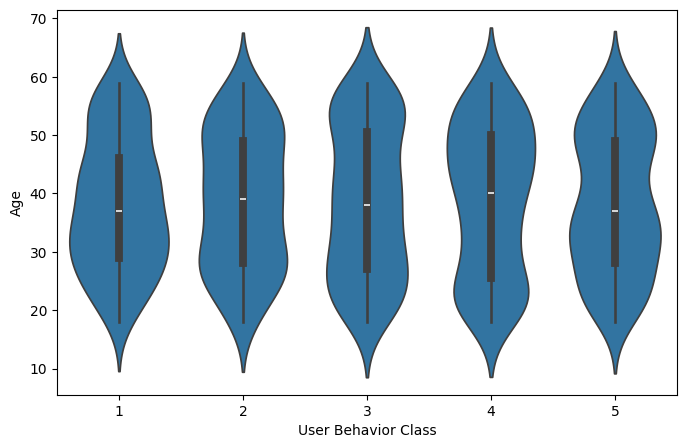

In [ ]:


plt.figure(figsize=(8, 5))
sns.boxplot(x='User Behavior Class', y='Age', data=df)
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(x='User Behavior Class', y='Age', data=df)
plt.show()

Gender and User Behavior Class

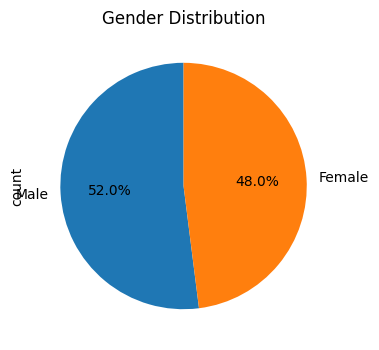

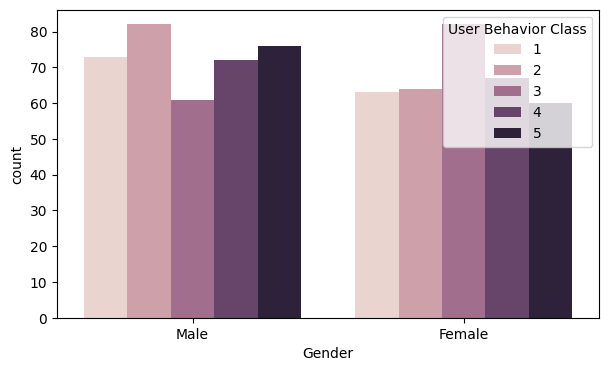

In [ ]:
plt.figure(figsize=(7, 4))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()
plt.figure(figsize=(7, 4))
sns.countplot(x='Gender', hue='User Behavior Class', data=df)
plt.show()

### Explore relationships between features and other features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


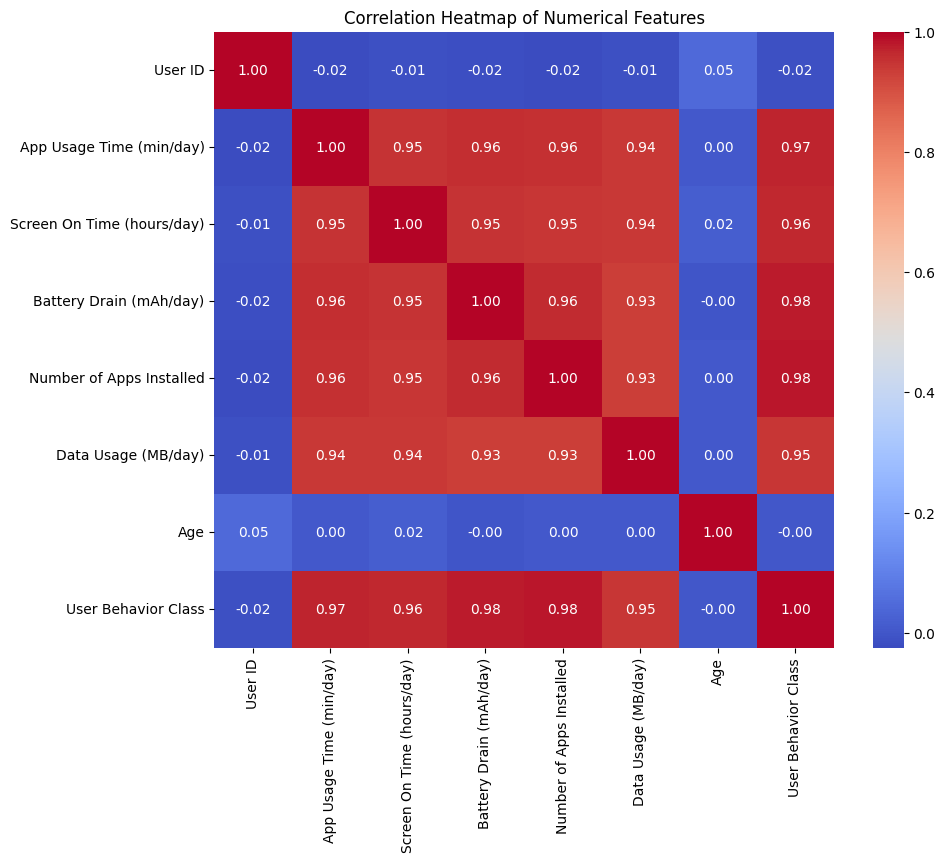

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Device Model and Operating System

<Axes: xlabel='Device Model', ylabel='count'>

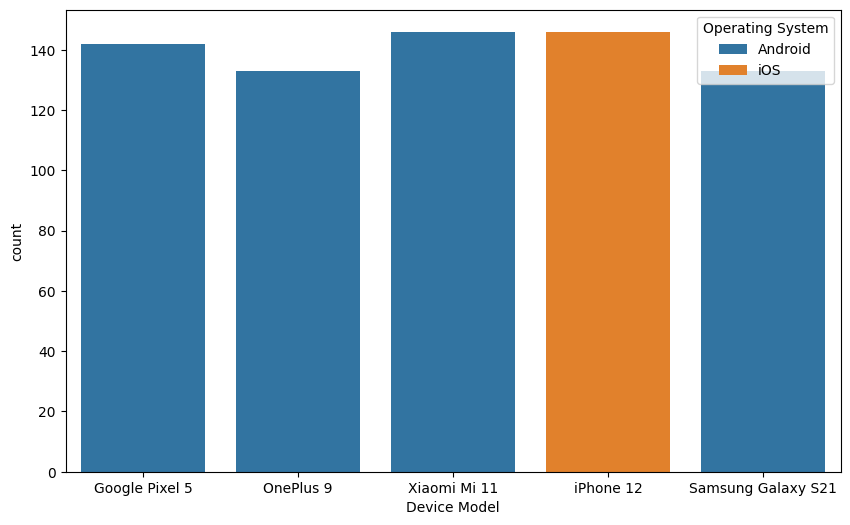

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Device Model', hue='Operating System', data=df)

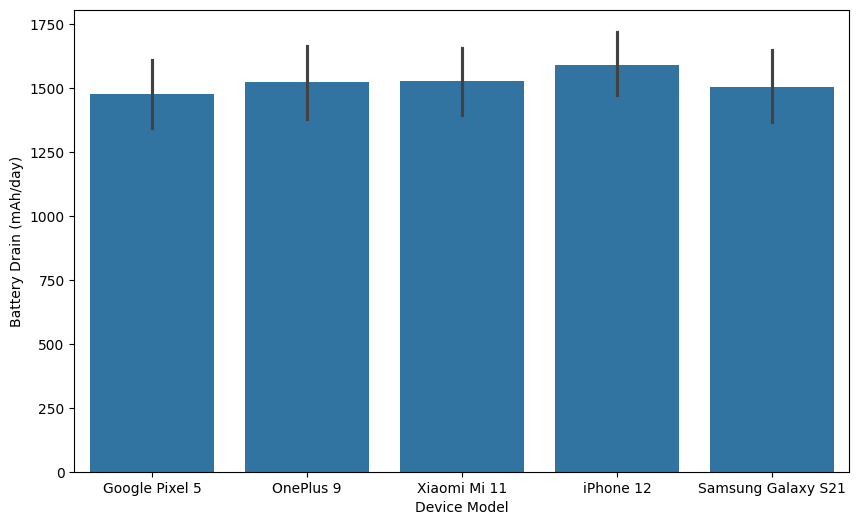

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Device Model', y='Battery Drain (mAh/day)', data=df)
plt.show()

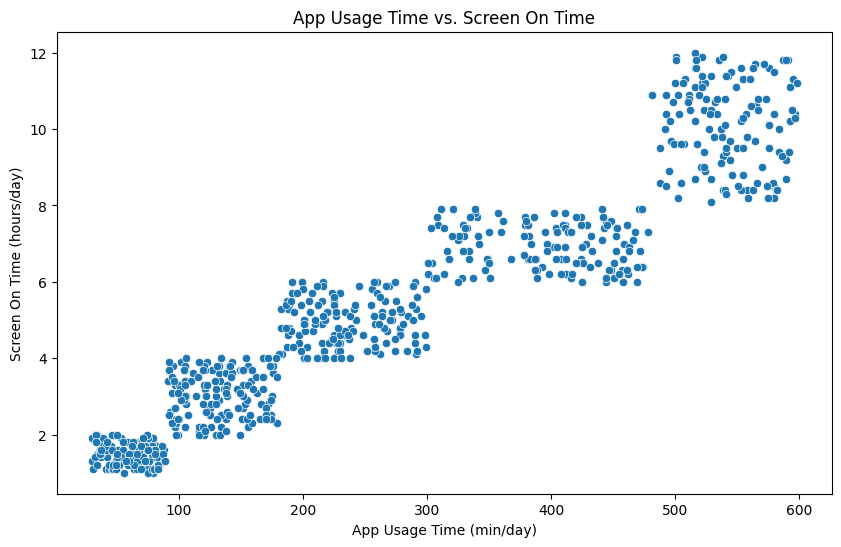

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='App Usage Time (min/day)', y='Screen On Time (hours/day)', data=df)
plt.title('App Usage Time vs. Screen On Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')


plt.show()


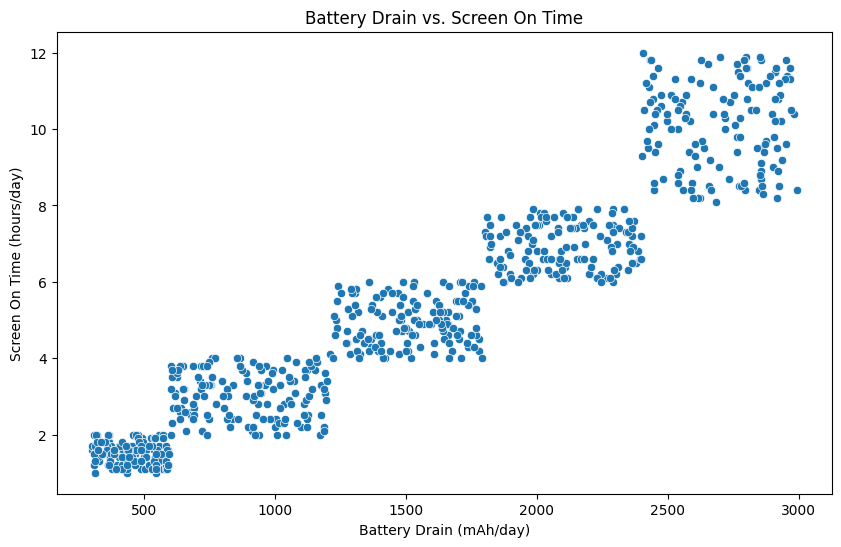

In [ ]:
#Battery Drain and screen
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery Drain (mAh/day)', y='Screen On Time (hours/day)', data=df)
plt.title('Battery Drain vs. Screen On Time')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.show()

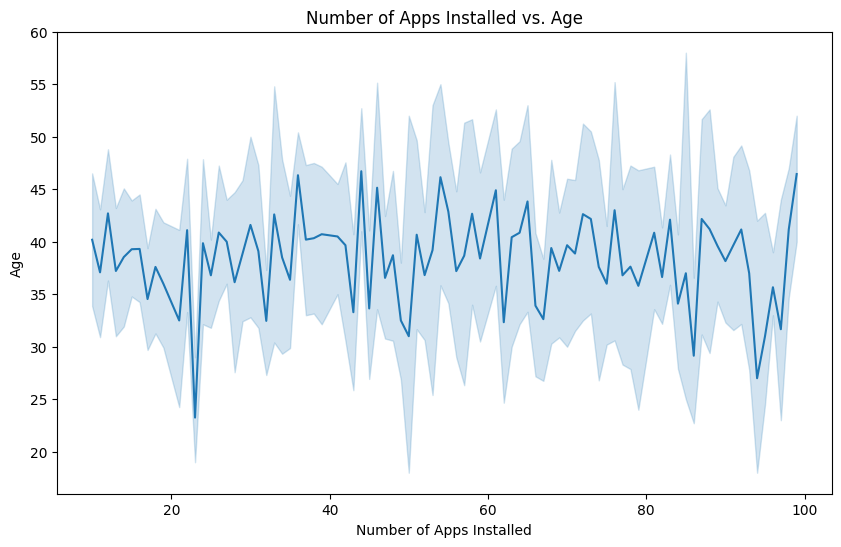

In [ ]:
#Number of Apps Installed and age
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Apps Installed', y='Age', data=df)
plt.title('Number of Apps Installed vs. Age')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Age')
plt.show()

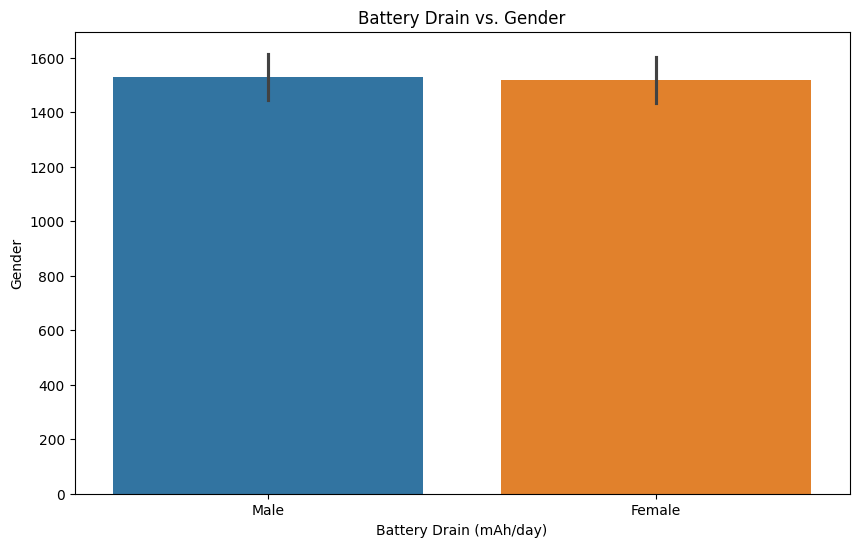

In [ ]:
#Battery Drain and age
plt.figure(figsize=(10, 6))
sns.barplot(y='Battery Drain (mAh/day)',x='Gender' ,hue='Gender', data=df)
plt.title('Battery Drain vs. Gender')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Gender')
plt.show()

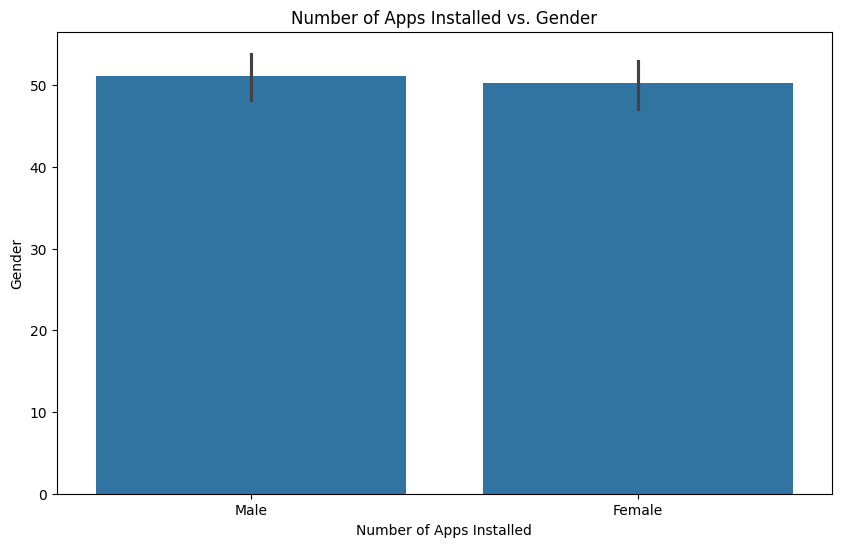

In [ ]:
##Number of Apps Installed and Gender
plt.figure(figsize=(10, 6))
sns.barplot(y='Number of Apps Installed', x='Gender', data=df)
plt.title('Number of Apps Installed vs. Gender')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Gender')
plt.show()


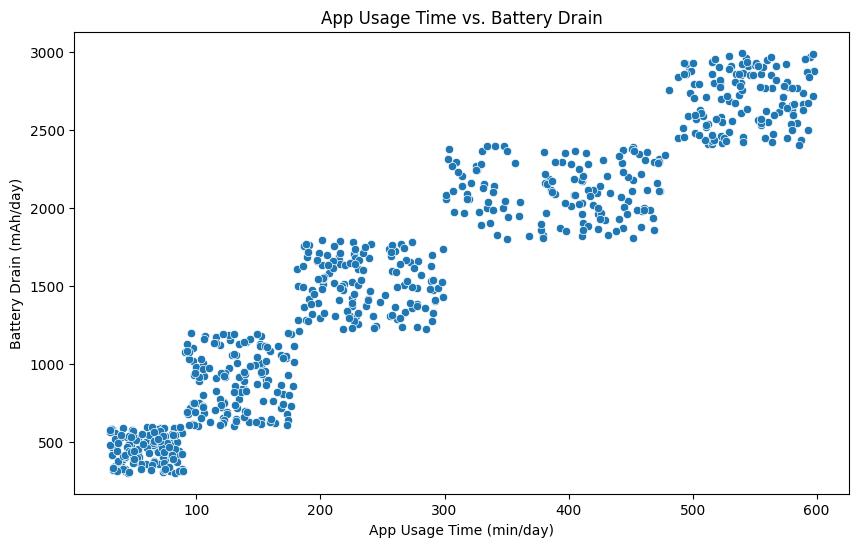

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=df)
plt.title('App Usage Time vs. Battery Drain')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

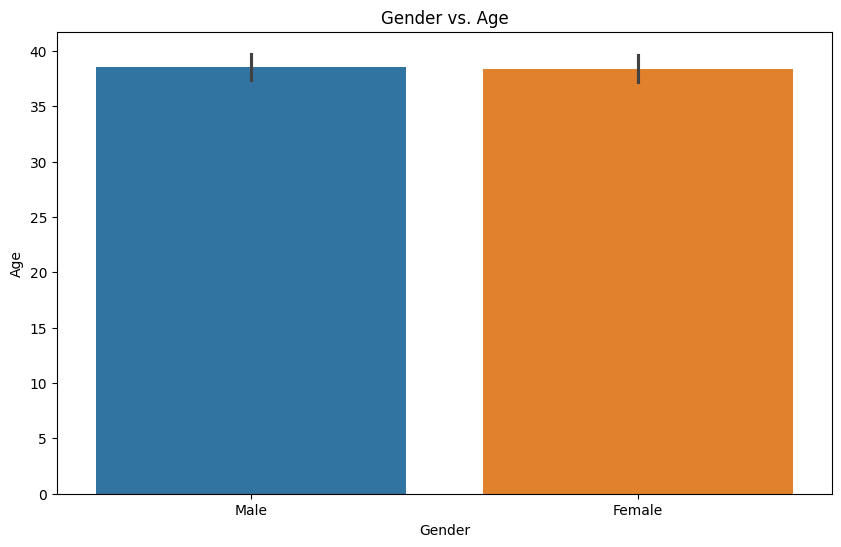

In [ ]:
#Gender and Age
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Age',hue='Gender', data=df)
plt.title('Gender vs. Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

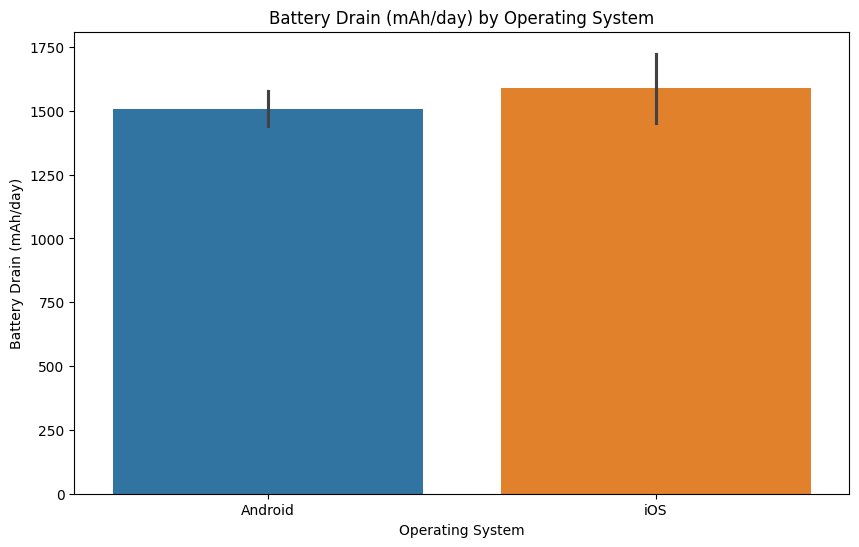

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Operating System', y='Battery Drain (mAh/day)',hue='Operating System', data=df)
plt.title('Battery Drain (mAh/day) by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

### Split variables into numerical and categorical

In [ ]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['User ID', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']
Categorical Features: ['Device Model', 'Operating System', 'Gender']


### Numerical Features

In [ ]:
numerical_features =X_train.select_dtypes(include=['number']).columns.tolist()
discrete_var = ['Discrete_Variables']
continuous_var = [var for var in numerical_features if var not in discrete_var + ['User ID']]

discrete_var = [var for var in numerical_features if var not in continuous_var + ['User ID']]

print("Continuous variables:", continuous_var)
print("Discrete variables:", discrete_var)



Continuous variables: ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']
Discrete variables: []


In [ ]:
print(len(continuous_var))
X_train[continuous_var].head()

6


App Usage Time (min/day)  Screen On Time (hours/day)  \
59                        325                         7.1   
297                       170                         2.7   
13                        215                         4.9   
248                       168                         4.0   
394                       589                         9.2   

     Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
59                      2269                        64                 1053   
297                      805                        26                  344   
13                      1662                        43                  857   
248                      866                        22                  581   
394                     2663                        84                 1774   

     Age  
59    56  
297   53  
13    43  
248   50  
394   45

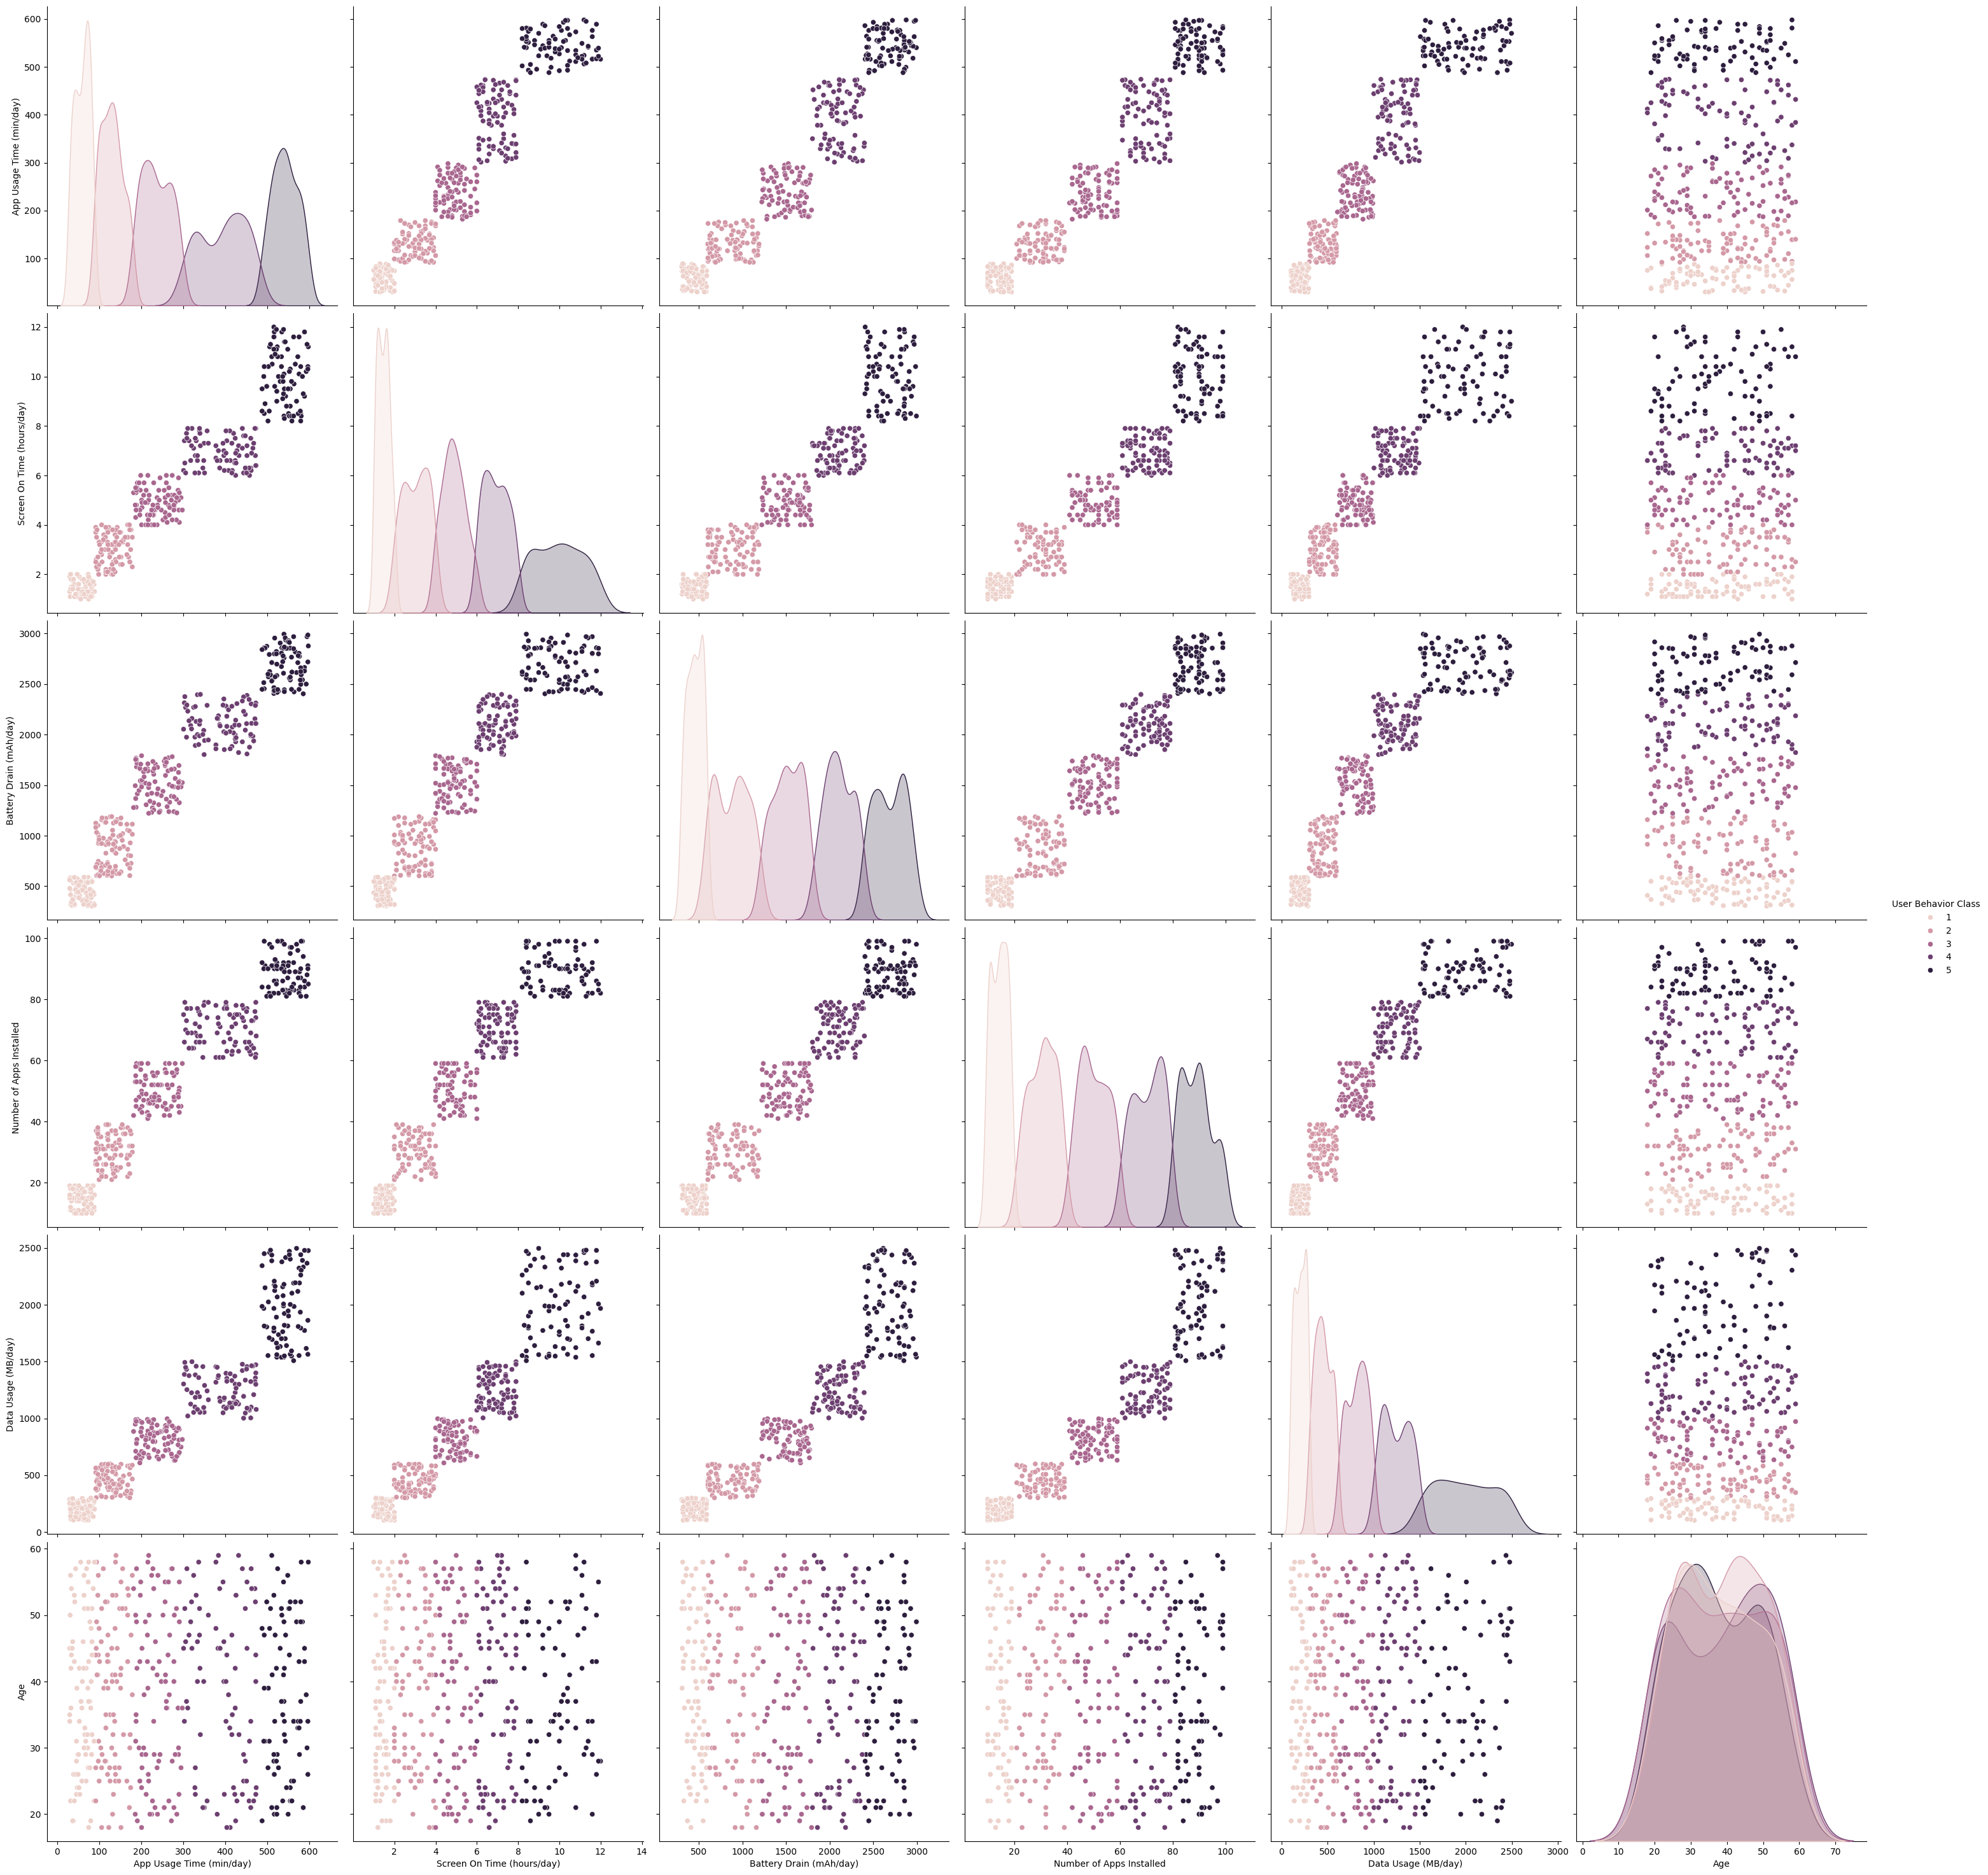

In [ ]:
data_with_target = pd.concat([X_train[continuous_var], y_train], axis=1)

sns.pairplot(data_with_target, hue= 'User Behavior Class', height=5)

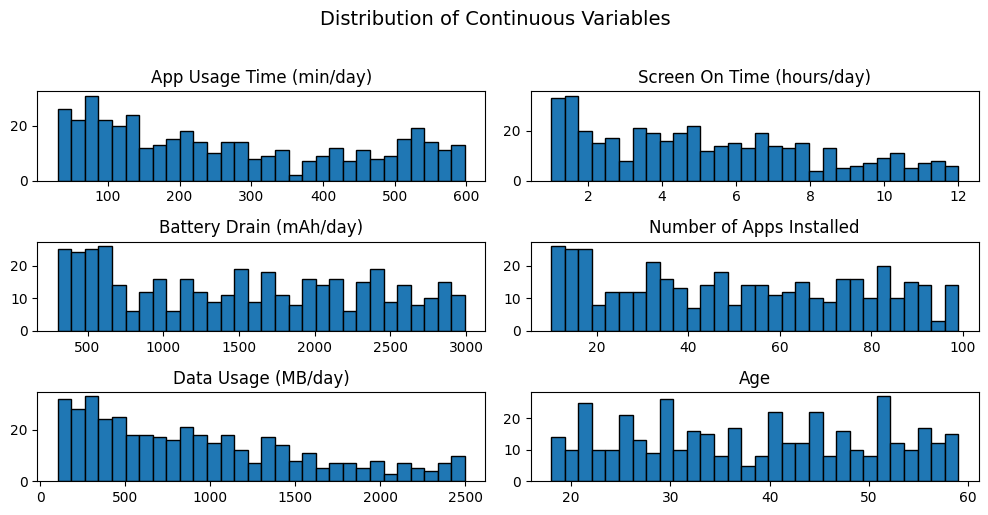

In [ ]:

X_train[continuous_var].hist(bins=30,figsize=(10, 5),edgecolor='black',grid=False)

plt.suptitle("Distribution of Continuous Variables", y=1.02, fontsize=14)
plt.tight_layout()

In [ ]:
for column in continuous_var:
    skewness = X_train[column].skew()
    print(f"Skewness for column '{column}': {skewness}")

Skewness for column 'App Usage Time (min/day)': 0.38371669906586336
Skewness for column 'Screen On Time (hours/day)': 0.4532237699971261
Skewness for column 'Battery Drain (mAh/day)': 0.13025589939308088
Skewness for column 'Number of Apps Installed': 0.10420490376924132
Skewness for column 'Data Usage (MB/day)': 0.7233638126085579
Skewness for column 'Age': 0.028244177975127797


### Categorical Feature

In [ ]:
print(len(categorical_features))
X_train[categorical_features].head()

3


Device Model Operating System  Gender
59        iPhone 12              iOS    Male
297       iPhone 12              iOS  Female
13     Xiaomi Mi 11          Android    Male
248    Xiaomi Mi 11          Android  Female
394  Google Pixel 5          Android  Female

Device Model        0.007143
Operating System    0.002857
Gender              0.002857
dtype: float64


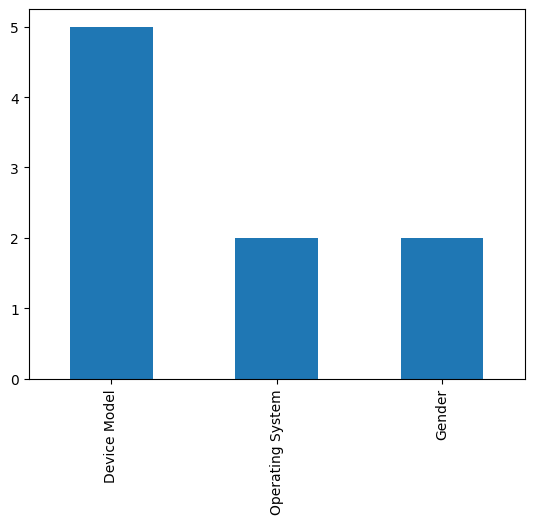

In [ ]:

cardinalith = X_train[categorical_features].nunique().sort_values(ascending=False)
print(cardinalith / df.shape[0])
cardinalith.plot.bar();

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


# Data Cleaning

In [ ]:
df

User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1                           4.7                     1331   
2                           4.0                      761   
3                           4.8                     1676   
4                           4.3                     1367   
..                          ...                      ...   
695                         3.9                     1082   
696                         6.8                     1965   
697                         3.1                      942   
698                         1.7                      431   
699                         5.4                     1306   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                          67                 1122   40    Male   
1                          42                  944   47  Female   
2                          32                  322   42    Male   
3                          56                  871   20    Male   
4                          58                  988   31  Female   
..                        ...                  ...  ...     ...   
695                        26                  381   22    Male   
696                        68                 1201   59    Male   
697                        22                  457   50  Female   
698                        13                  224   44    Male   
699                        49                  828   23  Female   

     User Behavior Class  
0                      4  
1                      3  
2                      2  
3                      3  
4                      3  
..                   ...  
695                    2  
696                    4  
697                    2  
698                    1  
699                    3  

[700 rows x 11 columns]

### Type Conversion

In [ ]:
print("\nData Types Before Conversion:")
print(X_train.dtypes)

type_mapping = {
    'User ID': int,
    'Device Model':object ,
    'Operating System':object,
    'App Usage Time (min/day)':int,
    'Screen On Time (hours/day)':float,
    'Battery Drain (mAh/day)':int,
    'Number of Apps Installed':int,
    'Data Usage (MB/day)':int,
    'Age':int,
    'Gender':object
}

for column, dtype in type_mapping.items():
    X_train[column] = X_train[column].astype(dtype)

print("\nData Types After Conversion:")
print(X_train.dtypes)


Data Types Before Conversion:
User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
dtype: object

Data Types After Conversion:
User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
dtype: object


### Drop Unnecessary Features

In [ ]:
y_train = pd.DataFrame(y_train)
y_train.index = X_train['User ID']

In [ ]:
X_train.set_index('User ID', inplace=True)

In [ ]:
X_train.head()


Device Model Operating System  App Usage Time (min/day)  \
User ID                                                              
60            iPhone 12              iOS                       325   
298           iPhone 12              iOS                       170   
14         Xiaomi Mi 11          Android                       215   
249        Xiaomi Mi 11          Android                       168   
395      Google Pixel 5          Android                       589   

         Screen On Time (hours/day)  Battery Drain (mAh/day)  \
User ID                                                        
60                              7.1                     2269   
298                             2.7                      805   
14                              4.9                     1662   
249                             4.0                      866   
395                             9.2                     2663   

         Number of Apps Installed  Data Usage (MB/day)  Age  Gender  
User ID                                                              
60                             64                 1053   56    Male  
298                            26                  344   53  Female  
14                             43                  857   43    Male  
249                            22                  581   50  Female  
395                            84                 1774   45  Female

# Feature Engineering and Transformation

###Feature Transformation (Data Usage (MB/day) skewness ~0.72)

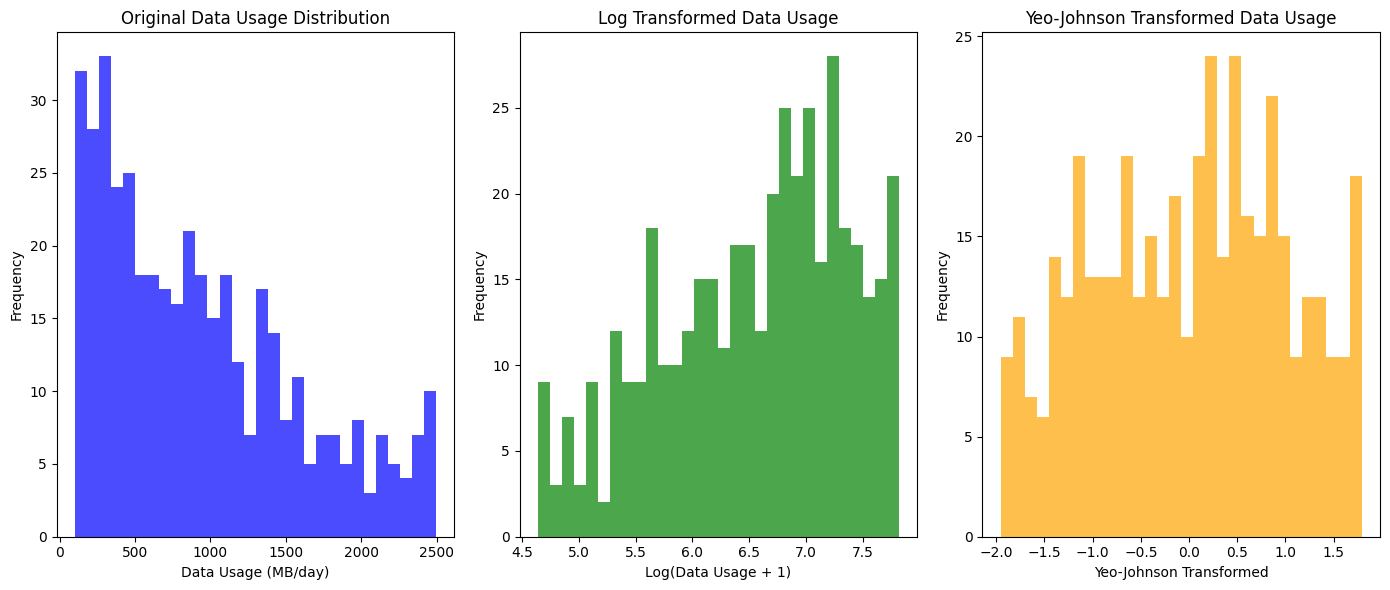

In [ ]:
from sklearn.preprocessing import PowerTransformer

y_fake = X_train['Data Usage (MB/day)']

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.hist(y_fake.dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Original Data Usage Distribution')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')

y_log = np.log1p(y_fake.dropna())

plt.subplot(1, 3, 2)
plt.hist(y_log, bins=30, color='green', alpha=0.7)
plt.title('Log Transformed Data Usage')
plt.xlabel('Log(Data Usage + 1)')
plt.ylabel('Frequency')

pt = PowerTransformer()
y_yeojohnson = pt.fit_transform(y_fake.dropna().values.reshape(-1, 1)).flatten()

plt.subplot(1, 3, 3)
plt.hist(y_yeojohnson, bins=30, color='orange', alpha=0.7)
plt.title('Yeo-Johnson Transformed Data Usage')
plt.xlabel('Yeo-Johnson Transformed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])

print("Numerical columns:")
print(numerical_features.columns)

for column in numerical_features.columns:
    Q1 = numerical_features[column].quantile(0.25)
    Q3 = numerical_features[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numerical_features[(numerical_features[column] < lower_bound) |
                                  (numerical_features[column] > upper_bound)][column]

    print(f"\nAnalysis for column: {column}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Outliers: {outliers.tolist()}")


Numerical columns:
Index(['User ID', 'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'User Behavior Class'],
      dtype='object')

Analysis for column: User ID
Q1: 175.75
Q3: 525.25
IQR: 349.5
Lower bound: -348.5
Upper bound: 1049.5
Outliers: []

Analysis for column: App Usage Time (min/day)
Q1: 113.25
Q3: 434.25
IQR: 321.0
Lower bound: -368.25
Upper bound: 915.75
Outliers: []

Analysis for column: Screen On Time (hours/day)
Q1: 2.5
Q3: 7.4
IQR: 4.9
Lower bound: -4.8500000000000005
Upper bound: 14.75
Outliers: []

Analysis for column: Battery Drain (mAh/day)
Q1: 722.25
Q3: 2229.5
IQR: 1507.25
Lower bound: -1538.625
Upper bound: 4490.375
Outliers: []

Analysis for column: Number of Apps Installed
Q1: 26.0
Q3: 74.0
IQR: 48.0
Lower bound: -46.0
Upper bound: 146.0
Outliers: []

Analysis for column: Data Usage (MB/day)
Q1: 373.0
Q3: 1341.0
IQR: 968.0
Lower bound: -1079.0
Upper bound

###  Missing Values

In [ ]:
print(X_train.isnull().sum())

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
dtype: int64


### Creating New Feature

In [ ]:
!pip install feature-engine

from feature_engine.selection import DropFeatures

X_train['Screen On Time (min/day)'] = X_train['Screen On Time (hours/day)'] * 60
X_train['Daily Usage Intensity'] = X_train['App Usage Time (min/day)'] / X_train['Screen On Time (min/day)']

X_train.head()



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.8 MB/s eta 0:00:00


Device Model Operating System  App Usage Time (min/day)  \
User ID                                                              
60            iPhone 12              iOS                       325   
298           iPhone 12              iOS                       170   
14         Xiaomi Mi 11          Android                       215   
249        Xiaomi Mi 11          Android                       168   
395      Google Pixel 5          Android                       589   

         Screen On Time (hours/day)  Battery Drain (mAh/day)  \
User ID                                                        
60                              7.1                     2269   
298                             2.7                      805   
14                              4.9                     1662   
249                             4.0                      866   
395                             9.2                     2663   

         Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
User ID                                                               
60                             64                 1053   56    Male   
298                            26                  344   53  Female   
14                             43                  857   43    Male   
249                            22                  581   50  Female   
395                            84                 1774   45  Female   

         Screen On Time (min/day)  Daily Usage Intensity  
User ID                                                   
60                          426.0               0.762911  
298                         162.0               1.049383  
14                          294.0               0.731293  
249                         240.0               0.700000  
395                         552.0               1.067029

### Drop features

In [ ]:
drop_features = DropFeatures(features_to_drop=['Screen On Time (hours/day)', 'App Usage Time (min/day)','Screen On Time (min/day)'])
X_train = drop_features.fit_transform(X_train)

X_train.head()

Device Model Operating System  Battery Drain (mAh/day)  \
User ID                                                             
60            iPhone 12              iOS                     2269   
298           iPhone 12              iOS                      805   
14         Xiaomi Mi 11          Android                     1662   
249        Xiaomi Mi 11          Android                      866   
395      Google Pixel 5          Android                     2663   

         Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
User ID                                                               
60                             64                 1053   56    Male   
298                            26                  344   53  Female   
14                             43                  857   43    Male   
249                            22                  581   50  Female   
395                            84                 1774   45  Female   

         Daily Usage Intensity  
User ID                         
60                    0.762911  
298                   1.049383  
14                    0.731293  
249                   0.700000  
395                   1.067029

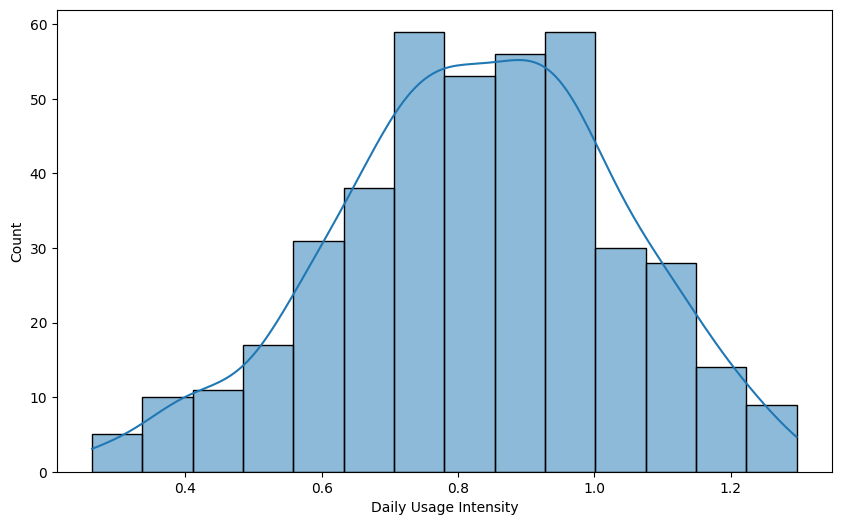

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x="Daily Usage Intensity", kde=True)
plt.show()



<Axes: >

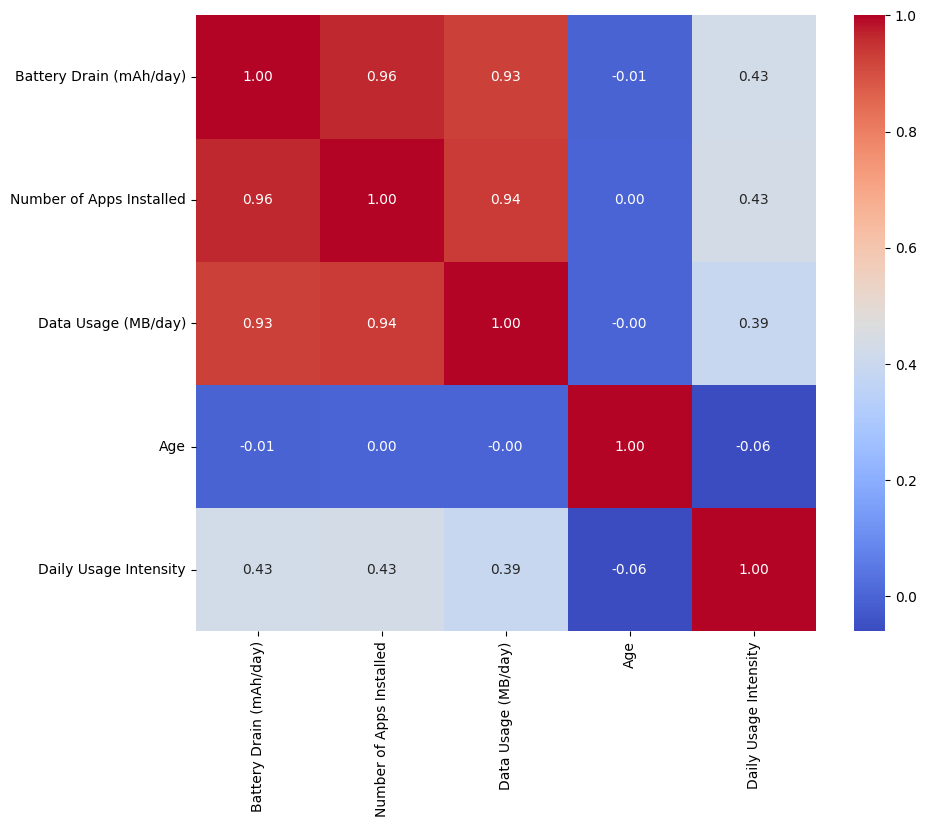

In [ ]:

corr_matrix = X_train.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

#Encoding categorical variables


In [ ]:
categorical_features

['Device Model', 'Operating System', 'Gender']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder



one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

columns_encoded = one_hot_encoder.fit_transform(X_train[['Device Model', 'Operating System']])

columns_encoded = pd.DataFrame(columns_encoded,columns=one_hot_encoder.get_feature_names_out(['Device Model', 'Operating System']), index=X_train.index)

X_train = pd.concat([X_train.drop(['Device Model', 'Operating System'], axis=1), columns_encoded], axis=1)


In [ ]:
X_train

Battery Drain (mAh/day)  Number of Apps Installed  \
User ID                                                      
60                          2269                        64   
298                          805                        26   
14                          1662                        43   
249                          866                        22   
395                         2663                        84   
...                          ...                       ...   
141                         1510                        42   
481                          954                        39   
365                         2539                        84   
31                          1361                        44   
25                          1711                        59   

         Data Usage (MB/day)  Age  Gender  Daily Usage Intensity  \
User ID                                                            
60                      1053   56       1               0.762911   
298                      344   53       0               1.049383   
14                       857   43       1               0.731293   
249                      581   50       0               0.700000   
395                     1774   45       0               1.067029   
...                      ...  ...     ...                    ...   
141                      655   50       0               0.701923   
481                      441   51       1               1.076389   
365                     1935   34       1               1.122093   
31                       889   37       0               0.722222   
25                       748   58       1               0.900000   

         Device Model_OnePlus 9  Device Model_Samsung Galaxy S21  \
User ID                                                            
60                          0.0                              0.0   
298                         0.0                              0.0   
14                          0.0                              0.0   
249                         0.0                              0.0   
395                         0.0                              0.0   
...                         ...                              ...   
141                         0.0                              0.0   
481                         0.0                              0.0   
365                         0.0                              0.0   
31                          0.0                              0.0   
25                          1.0                              0.0   

         Device Model_Xiaomi Mi 11  Device Model_iPhone 12  \
User ID                                                      
60                             0.0                     1.0   
298                            0.0                     1.0   
14                             1.0                     0.0   
249                            1.0                     0.0   
395                            0.0                     0.0   
...                            ...                     ...   
141                            1.0                     0.0   
481                            0.0                     1.0   
365                            1.0                     0.0   
31                             1.0                     0.0   
25                             0.0                     0.0   

         Operating System_iOS  
User ID                        
60                        1.0  
298                       1.0  
14                        0.0  
249                       0.0  
395                       0.0  
...                       ...  
141                       0.0  
481                       1.0  
365                       0.0  
31                        0.0  
25                        0.0  

[420 rows x 11 columns]

In [ ]:
X_train.isnull().sum()

Battery Drain (mAh/day)            0
Number of Apps Installed           0
Data Usage (MB/day)                0
Age                                0
Gender                             0
Daily Usage Intensity              0
Device Model_OnePlus 9             0
Device Model_Samsung Galaxy S21    0
Device Model_Xiaomi Mi 11          0
Device Model_iPhone 12             0
Operating System_iOS               0
dtype: int64

# Feature scaling

In [ ]:
numerical_features

User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
0          1                       393                         6.4   
1          2                       268                         4.7   
2          3                       154                         4.0   
3          4                       239                         4.8   
4          5                       187                         4.3   
..       ...                       ...                         ...   
695      696                        92                         3.9   
696      697                       316                         6.8   
697      698                        99                         3.1   
698      699                        62                         1.7   
699      700                       212                         5.4   

     Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                       1872                        67                 1122   
1                       1331                        42                  944   
2                        761                        32                  322   
3                       1676                        56                  871   
4                       1367                        58                  988   
..                       ...                       ...                  ...   
695                     1082                        26                  381   
696                     1965                        68                 1201   
697                      942                        22                  457   
698                      431                        13                  224   
699                     1306                        49                  828   

     Age  User Behavior Class  
0     40                    4  
1     47                    3  
2     42                    2  
3     20                    3  
4     31                    3  
..   ...                  ...  
695   22                    2  
696   59                    4  
697   50                    2  
698   44                    1  
699   23                    3  

[700 rows x 8 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler_features = [
  'Daily Usage Intensity',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age']

X_train[standard_scaler_features] = standard_scaler.fit_transform(X_train[standard_scaler_features])

In [ ]:
X_train.head()

Battery Drain (mAh/day)  Number of Apps Installed  \
User ID                                                      
60                      0.921688                  0.494469   
298                    -0.873083                 -0.912506   
14                      0.177545                 -0.283070   
249                    -0.798301                 -1.060609   
395                     1.404707                  1.234982   

         Data Usage (MB/day)       Age  Gender  Daily Usage Intensity  \
User ID                                                                 
60                  0.186244  1.478387       1              -0.312573   
298                -0.909172  1.228082       0               1.073349   
14                 -0.116579  0.393733       1              -0.465539   
249                -0.543003  0.977778       0              -0.616929   
395                 1.300201  0.560603       0               1.158720   

         Device Model_OnePlus 9  Device Model_Samsung Galaxy S21  \
User ID                                                            
60                          0.0                              0.0   
298                         0.0                              0.0   
14                          0.0                              0.0   
249                         0.0                              0.0   
395                         0.0                              0.0   

         Device Model_Xiaomi Mi 11  Device Model_iPhone 12  \
User ID                                                      
60                             0.0                     1.0   
298                            0.0                     1.0   
14                             1.0                     0.0   
249                            1.0                     0.0   
395                            0.0                     0.0   

         Operating System_iOS  
User ID                        
60                        1.0  
298                       1.0  
14                        0.0  
249                       0.0  
395                       0.0

In [ ]:
X_train.isnull().sum()

Battery Drain (mAh/day)            0
Number of Apps Installed           0
Data Usage (MB/day)                0
Age                                0
Gender                             0
Daily Usage Intensity              0
Device Model_OnePlus 9             0
Device Model_Samsung Galaxy S21    0
Device Model_Xiaomi Mi 11          0
Device Model_iPhone 12             0
Operating System_iOS               0
dtype: int64

# Final Data Preparation


### Build transformation pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class SetIndexByUserID(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()

        X_copy.set_index('User ID', inplace=True)

        return X_copy


class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self, add_daily_usage_intensity=True):
        self.add_daily_usage_intensity = add_daily_usage_intensity

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()

        if self.add_daily_usage_intensity:
            X_copy['Screen On Time (min/day)'] = X_copy['Screen On Time (hours/day)'] * 60
            X_copy['Daily Usage Intensity'] = X_copy['App Usage Time (min/day)'] / X_copy['Screen On Time (min/day)']

        return X_copy


class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, drop_first=True):
        self.columns = columns
        self.drop_first = drop_first
        self.encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore') # handle_unknown='ignore' to avoid errors with unseen values in test data

    def fit(self, X, y=None):
        if self.columns:
            self.encoder.fit(X[self.columns])
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.columns:
            X_encoded = self.encoder.transform(X_copy[self.columns])
            encoded_df = pd.DataFrame(X_encoded,
                                    columns=self.encoder.get_feature_names_out(self.columns),
                                    index=X_copy.index)
            X_copy = pd.concat([X_copy.drop(self.columns, axis=1), encoded_df], axis=1)
        return X_copy


class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column=None):
        self.column = column
        self.encoder = LabelEncoder()

    def fit(self, X, y=None):
        if self.column:
            self.encoder.fit(X[self.column])
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.column:
            X_copy[self.column] = self.encoder.transform(X_copy[self.column])
        return X_copy

class ScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, standard_scaler_features):
        self.standard_scaler_features = standard_scaler_features
        self.standard_scaler = StandardScaler()

    def fit(self, X, y=None):
        if self.standard_scaler_features:
            self.standard_scaler.fit(X[self.standard_scaler_features])

        return self

    def transform(self, X):
        X_copy = X.copy()

        if self.standard_scaler_features:
            X_copy[self.standard_scaler_features] = self.standard_scaler.transform(X_copy[self.standard_scaler_features])

        return X_copy





In [ ]:
add_daily_usage_intensity=True
features_to_drop = ['Screen On Time (hours/day)', 'App Usage Time (min/day)', 'Screen On Time (min/day)']
one_hot_encoder_columns = ['Device Model', 'Operating System']
label_encoder_column = 'Gender'
standard_scaler_features = ['Daily Usage Intensity', 'Battery Drain (mAh/day)',
                          'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

In [ ]:


y_train_cleaned = pd.DataFrame(y_train_copy)
y_train_cleaned.index = X_train_copy['User ID']

pipeline = Pipeline(steps=[
    ('set_index', SetIndexByUserID()),
    ('feature_engineering', FeatureEngineering(add_daily_usage_intensity=True)),
    ('drop_features', DropFeatures(features_to_drop=features_to_drop)),
    ('onehot_encoder', OneHotEncoderTransformer(columns=one_hot_encoder_columns)),
    ('label_encoder', LabelEncoderTransformer(column=label_encoder_column)),
    ('scaler', ScalerTransformer(standard_scaler_features=standard_scaler_features))
])



X_train_cleaned = pipeline.fit_transform(X_train_copy)

In [ ]:
assert X_train_cleaned.equals(X_train)


In [ ]:
assert y_train_cleaned.equals(y_train)

# Model Selection and Training

### Select appropriate algorithms using validation

In [ ]:
y_val_cleaned = pd.DataFrame(y_val)
y_val_cleaned.index = X_val['User ID']
X_val_cleaned = pipeline.transform(X_val)

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
X_val_cleaned


Battery Drain (mAh/day)  Number of Apps Installed  \
User ID                                                      
493                    -1.131755                 -1.171686   
436                    -0.881664                 -1.097635   
208                    -1.099881                 -1.097635   
673                     1.725902                  1.234982   
518                    -1.134207                 -1.171686   
...                          ...                       ...   
410                     1.040604                  0.383392   
454                    -1.177115                 -1.393840   
426                    -0.558017                 -0.986558   
428                    -0.674481                 -0.838455   
538                     1.415740                  1.160931   

         Data Usage (MB/day)       Age  Gender  Daily Usage Intensity  \
User ID                                                                 
493                -1.134745 -0.190311       0               0.673177   
436                -0.719135 -0.357181       0              -1.513362   
208                -0.793296 -1.274965       1               0.236206   
673                 2.326092 -0.941225       1              -0.403831   
518                -1.103844 -1.108095       1               0.296896   
...                      ...       ...     ...                    ...   
410                 0.774896  1.061212       1               0.729269   
454                -1.187275  0.393733       1               1.454683   
426                -0.546093 -0.106876       1              -0.259846   
428                -0.685145  1.061212       1              -1.775477   
538                 2.047989 -0.357181       0               0.304160   

         Device Model_OnePlus 9  Device Model_Samsung Galaxy S21  \
User ID                                                            
493                         0.0                              0.0   
436                         0.0                              0.0   
208                         0.0                              0.0   
673                         0.0                              0.0   
518                         0.0                              0.0   
...                         ...                              ...   
410                         0.0                              0.0   
454                         0.0                              0.0   
426                         0.0                              1.0   
428                         1.0                              0.0   
538                         0.0                              1.0   

         Device Model_Xiaomi Mi 11  Device Model_iPhone 12  \
User ID                                                      
493                            1.0                     0.0   
436                            1.0                     0.0   
208                            0.0                     0.0   
673                            1.0                     0.0   
518                            0.0                     1.0   
...                            ...                     ...   
410                            0.0                     0.0   
454                            0.0                     0.0   
426                            0.0                     0.0   
428                            0.0                     0.0   
538                            0.0                     0.0   

         Operating System_iOS  
User ID                        
493                       0.0  
436                       0.0  
208                       0.0  
673                       0.0  
518                       1.0  
...                       ...  
410                       0.0  
454                       0.0  
426                       0.0  
428                       0.0  
538                       0.0  

[140 rows x 11 columns]

1. Logistic Regression

Logistic Regression Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 0.9786
Training Recall: 1.0000
Validation Recall: 0.9786
Training Precision: 0.9793
Validation Precision: 0.9793
Training F1 Score: 0.9786
Validation F1 Score: 0.9786
Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        27
           2       0.96      0.93      0.95        29
           3       1.00      0.96      0.98        28
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        28

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



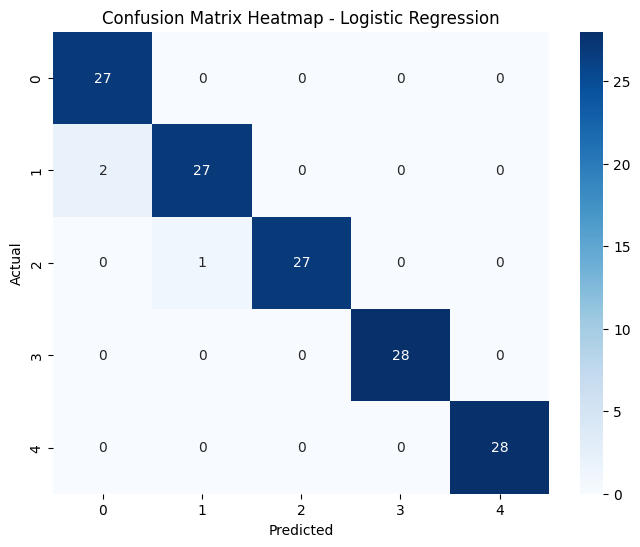

In [ ]:
#Logistic Regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score


log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_log_reg = log_reg_model.predict(X_train_cleaned)
y_val_pred_log_reg = log_reg_model.predict(X_val_cleaned)

acc_train_log_reg = accuracy_score(y_train_cleaned, y_train_pred_log_reg)
acc_val_log_reg = accuracy_score(y_val_cleaned, y_val_pred_log_reg)
recall_train_log_reg = recall_score(y_train_cleaned, y_train_pred_log_reg, average='weighted')
recall_val_log_reg = recall_score(y_val_cleaned, y_val_pred_log_reg, average='weighted')
precision_log_reg = precision_score(y_val_cleaned, y_val_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_val_cleaned, y_val_pred_log_reg, average='weighted')
f1_val_log_reg = f1_score(y_val_cleaned, y_val_pred_log_reg, average='weighted')
confusion_matrix_log_reg = confusion_matrix(y_val_cleaned, y_val_pred_log_reg)



print("Logistic Regression Accuracy:")
print(f"Training Accuracy: {acc_train_log_reg:.4f}")
print(f"Validation Accuracy: {acc_val_log_reg:.4f}")
print(f"Training Recall: {recall_train_log_reg:.4f}")
print(f"Validation Recall: {recall_val_log_reg:.4f}")
print(f"Training Precision: {precision_log_reg:.4f}")
print(f"Validation Precision: {precision_log_reg:.4f}")
print(f"Training F1 Score: {f1_log_reg:.4f}")
print(f"Validation F1 Score: {f1_val_log_reg:.4f}")

print("Classification Report:")
print(classification_report(y_val_cleaned, y_val_pred_log_reg))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix Heatmap - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



2. K-Nearest Neighbors (KNN)

KNN Accuracy:
Training Accuracy: 0.9619
Validation Accuracy: 0.9071
Training Recall: 0.9619
Validation Recall: 0.9071
Training Precision: 0.9108
Validation Precision: 0.9108
Training F1 Score: 0.9074
Validation F1 Score: 0.9074
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.89      0.83        27
           2       0.85      0.76      0.80        29
           3       0.93      0.96      0.95        28
           4       1.00      0.93      0.96        28
           5       1.00      1.00      1.00        28

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140



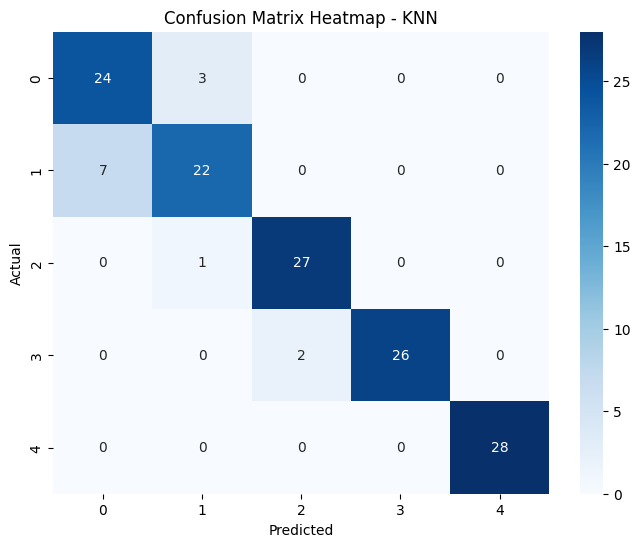

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_knn = knn_model.predict(X_train_cleaned)
y_val_pred_knn = knn_model.predict(X_val_cleaned)

acc_train_knn = accuracy_score(y_train_cleaned, y_train_pred_knn)
acc_val_knn = accuracy_score(y_val_cleaned, y_val_pred_knn)
recall_train_knn = recall_score(y_train_cleaned, y_train_pred_knn, average='weighted')
recall_val_knn = recall_score(y_val_cleaned, y_val_pred_knn, average='weighted')
precision_knn = precision_score(y_val_cleaned, y_val_pred_knn, average='weighted')
f1_knn = f1_score(y_val_cleaned, y_val_pred_knn, average='weighted')
f1_val_knn = f1_score(y_val_cleaned, y_val_pred_knn, average='weighted')
confusion_matrix_knn = confusion_matrix(y_val_cleaned, y_val_pred_knn)




print("KNN Accuracy:")
print(f"Training Accuracy: {acc_train_knn:.4f}")
print(f"Validation Accuracy: {acc_val_knn:.4f}")
print(f"Training Recall: {recall_train_knn:.4f}")
print(f"Validation Recall: {recall_val_knn:.4f}")
print(f"Training Precision: {precision_knn:.4f}")
print(f"Validation Precision: {precision_knn:.4f}")
print(f"Training F1 Score: {f1_knn:.4f}")
print(f"Validation F1 Score: {f1_val_knn:.4f}")


print("Classification Report:")
print(classification_report(y_val_cleaned, y_val_pred_knn))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix Heatmap - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




3. Decision Tree

Decision Tree Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Training Recall: 1.0000
Validation Recall: 1.0000
Training Precision: 1.0000
Validation Precision: 1.0000
Training F1 Score: 1.0000
Validation F1 Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



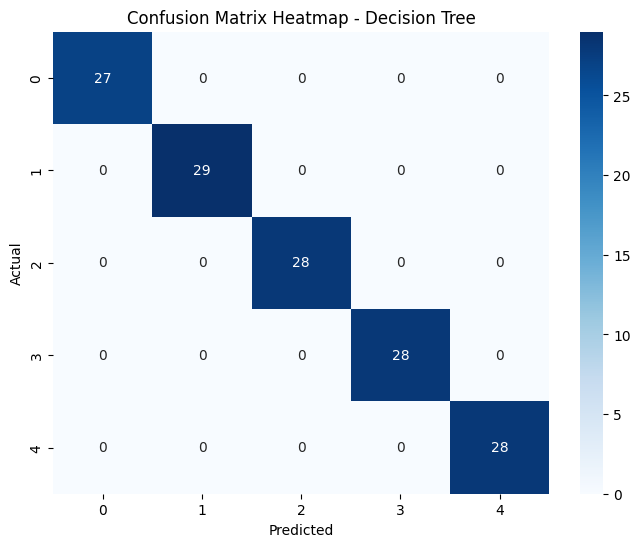

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_dt = decision_tree_model.predict(X_train_cleaned)
y_val_pred_dt = decision_tree_model.predict(X_val_cleaned)

acc_train_dt = accuracy_score(y_train_cleaned, y_train_pred_dt)
acc_val_dt = accuracy_score(y_val_cleaned, y_val_pred_dt)
recall_train_dt = recall_score(y_train_cleaned, y_train_pred_dt, average='weighted')
recall_val_dt = recall_score(y_val_cleaned, y_val_pred_dt, average='weighted')
precision_dt = precision_score(y_val_cleaned, y_val_pred_dt, average='weighted')
f1_dt = f1_score(y_val_cleaned, y_val_pred_dt, average='weighted')
f1_val_dt = f1_score(y_val_cleaned, y_val_pred_dt, average='weighted')
confusion_matrix_dt = confusion_matrix(y_val_cleaned, y_val_pred_dt)


print("Decision Tree Accuracy:")
print(f"Training Accuracy: {acc_train_dt:.4f}")
print(f"Validation Accuracy: {acc_val_dt:.4f}")
print(f"Training Recall: {recall_train_dt:.4f}")
print(f"Validation Recall: {recall_val_dt:.4f}")
print(f"Training Precision: {precision_dt:.4f}")
print(f"Validation Precision: {precision_dt:.4f}")
print(f"Training F1 Score: {f1_dt:.4f}")
print(f"Validation F1 Score: {f1_val_dt:.4f}")

print("Classification Report:")
print(classification_report(y_val_cleaned, y_val_pred_dt))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix Heatmap - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

4. Random Forest

Random Forest Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Training Recall: 1.0000
Validation Recall: 1.0000
Training Precision: 1.0000
Validation Precision: 1.0000
Training F1 Score: 1.0000
Validation F1 Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        28

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



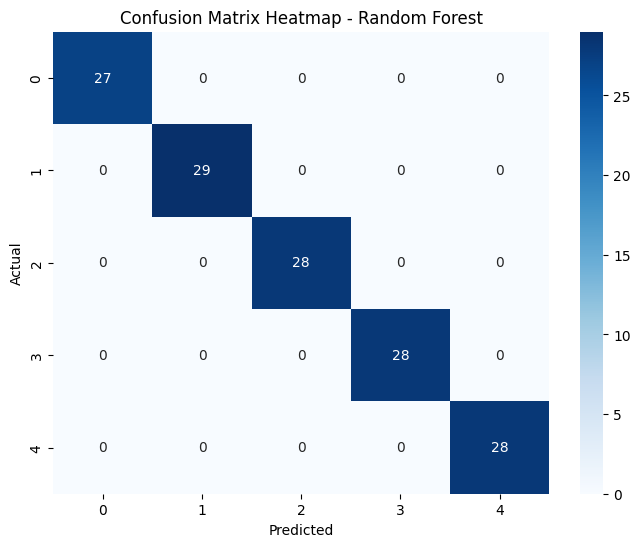

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score


random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_rf = random_forest_model.predict(X_train_cleaned)
y_val_pred_rf = random_forest_model.predict(X_val_cleaned)

acc_train_rf = accuracy_score(y_train_cleaned, y_train_pred_rf)
acc_val_rf = accuracy_score(y_val_cleaned, y_val_pred_rf)
recall_train_rf = recall_score(y_train_cleaned, y_train_pred_rf, average='weighted')
recall_val_rf = recall_score(y_val_cleaned, y_val_pred_rf, average='weighted')
precision_rf = precision_score(y_val_cleaned, y_val_pred_rf, average='weighted')
f1_rf = f1_score(y_val_cleaned, y_val_pred_rf, average='weighted')
f1_val_rf = f1_score(y_val_cleaned, y_val_pred_rf, average='weighted')
confusion_matrix_rf = confusion_matrix(y_val_cleaned, y_val_pred_rf)

print("Random Forest Accuracy:")
print(f"Training Accuracy: {acc_train_rf:.4f}")
print(f"Validation Accuracy: {acc_val_rf:.4f}")
print(f"Training Recall: {recall_train_rf:.4f}")
print(f"Validation Recall: {recall_val_rf:.4f}")
print(f"Training Precision: {precision_rf:.4f}")
print(f"Validation Precision: {precision_rf:.4f}")
print(f"Training F1 Score: {f1_rf:.4f}")
print(f"Validation F1 Score: {f1_val_rf:.4f}")

print("Classification Report:")
print(classification_report(y_val_cleaned, y_val_pred_rf))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix Heatmap - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
df = pd.read_csv('/content/user_behavior_dataset.csv')

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
combined_pipeline = Pipeline(steps=[
    ('preprocessing', pipeline),
    ('model', RandomForestClassifier())
])

In [ ]:
combined_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('set_index', SetIndexByUserID()),
                                 ('feature_engineering', FeatureEngineering()),
                                 ('drop_features',
                                  DropFeatures(features_to_drop=['Screen On '
                                                                 'Time '
                                                                 '(hours/day)',
                                                                 'App Usage '
                                                                 'Time '
                                                                 '(min/day)',
                                                                 'Screen On '
                                                                 'Time '
                                                                 '(min/day)'])),
                                 ('onehot_encoder',
                                  OneHotEncoderTransformer(columns=['Device '
                                                                    'Model',
                                                                    'Operating '
                                                                    'System'])),
                                 ('label_encoder',
                                  LabelEncoderTransformer(column='Gender')),
                                 ('scaler',
                                  ScalerTransformer(standard_scaler_features=['Daily '
                                                                              'Usage '
                                                                              'Intensity',
                                                                              'Battery '
                                                                              'Drain '
                                                                              '(mAh/day)',
                                                                              'Number '
                                                                              'of '
                                                                              'Apps '
                                                                              'Installed',
                                                                              'Data '
                                                                              'Usage '
                                                                              '(MB/day)',
                                                                              'Age']))])),
                ('model', RandomForestClassifier())])

In [ ]:
y_train_pred = combined_pipeline.predict(X_train)
y_val_pred = combined_pipeline.predict(X_val)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("\nKNN Model Accuracy:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


KNN Model Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
import pickle

best_pipeline = combined_pipeline

with open('model.pkl', 'wb') as file:
    pickle.dump(combined_pipeline, file)



best_pipeline

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('set_index', SetIndexByUserID()),
                                 ('feature_engineering', FeatureEngineering()),
                                 ('drop_features',
                                  DropFeatures(features_to_drop=['Screen On '
                                                                 'Time '
                                                                 '(hours/day)',
                                                                 'App Usage '
                                                                 'Time '
                                                                 '(min/day)',
                                                                 'Screen On '
                                                                 'Time '
                                                                 '(min/day)'])),
                                 ('onehot_encoder',
                                  OneHotEncoderTransformer(columns=['Device '
                                                                    'Model',
                                                                    'Operating '
                                                                    'System'])),
                                 ('label_encoder',
                                  LabelEncoderTransformer(column='Gender')),
                                 ('scaler',
                                  ScalerTransformer(standard_scaler_features=['Daily '
                                                                              'Usage '
                                                                              'Intensity',
                                                                              'Battery '
                                                                              'Drain '
                                                                              '(mAh/day)',
                                                                              'Number '
                                                                              'of '
                                                                              'Apps '
                                                                              'Installed',
                                                                              'Data '
                                                                              'Usage '
                                                                              '(MB/day)',
                                                                              'Age']))])),
                ('model', RandomForestClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score

with open('/content/model.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

print("Pipeline loaded successfully.")

y_test_pred = loaded_pipeline.predict(X_test)

test_acc = accuracy_score(y_test, y_test_pred)

print("\nEvaluation Results:")
print(f"Test Accuracy: {test_acc:.4f}")

Pipeline loaded successfully.

Evaluation Results:
Test Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
